In [284]:
%pip install numpy
%pip install pandas plotly
%pip install matplotlib
%pip install statsmodels
%pip install scikit-learn
%pip install --upgrade numpy scikit-learn
%pip install --upgrade numpy scipy


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal, f_oneway
from scipy.stats import shapiro
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.cluster import KMeans
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [286]:
data = pd.read_csv('dataAnalysis.csv')

print(data.head())

               PROLIFIC_PID         ResponseId   Order Technique  \
0  676b2f0c4db67fedf62f9bb2  R_11ctok9VXZF1vV3  second   analogy   
1  676b2f0c4db67fedf62f9bb2  R_11ctok9VXZF1vV3   first  baseline   
2  565c6d8cc121fe000ffc3ef5  R_1j7mZAyVE6uolgn  second   analogy   
3  565c6d8cc121fe000ffc3ef5  R_1j7mZAyVE6uolgn   first  baseline   
4  67700724f07c694ad429287a  R_8M5Mr6drjQ356cp   first  baseline   

   PerformanceScore  DescriptionScore  ChartDifficulties VARK  sketchscore  \
0                29                10                NaN    A            5   
1                25                10                NaN    A            5   
2                28                10                NaN    R            5   
3                24                10                NaN    R            5   
4                30                 8                NaN    A            5   

  VisualizationTechnique       ChartType  TotalTime  
0                analogy  ButterflyChart    507.939  
1             

         ChartType VisualizationTechnique PerformanceScore            \
                                                      mean       std   
0         BarChart                analogy          27.5000  5.932959   
1         BarChart               baseline          23.6875  4.812744   
2      BubbleChart                analogy          21.1875  6.112487   
3      BubbleChart               baseline          18.1250  4.096747   
4   ButterflyChart                analogy          27.6875  3.048907   
5   ButterflyChart               baseline          24.4375  2.874456   
6          Heatmap                analogy          20.9375  8.045444   
7          Heatmap               baseline          17.0625  6.835874   
8        Histogram                analogy          28.2500  4.809712   
9        Histogram               baseline          23.3750  5.702339   
10     StackedArea                analogy          20.0000  7.659417   
11     StackedArea               baseline          17.3125  8.08

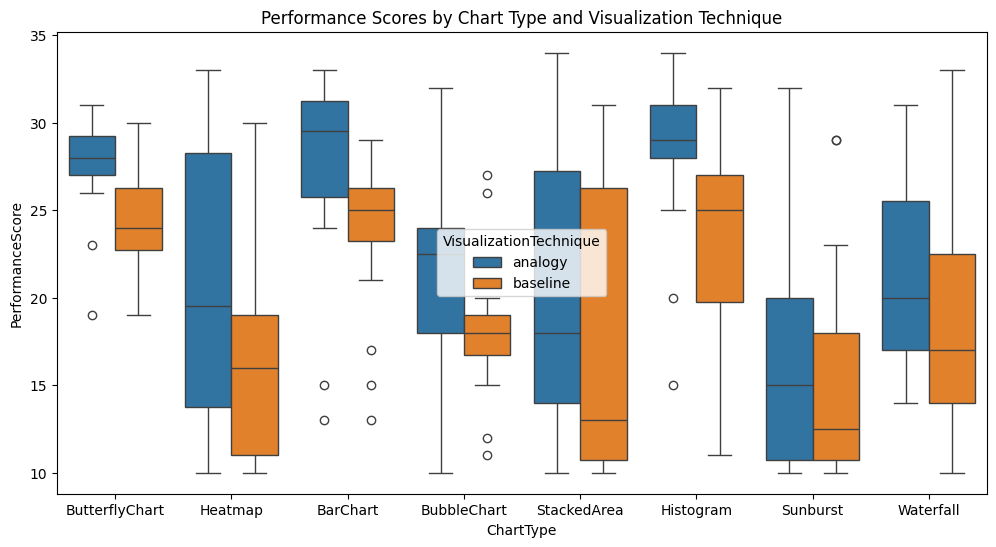

In [287]:
descriptive_stats = data.groupby(['ChartType', 'VisualizationTechnique'])[['PerformanceScore', 'TotalTime']].agg(['mean', 'std']).reset_index()


print(descriptive_stats)

# Visualize the Performance Scores
plt.figure(figsize=(12,6))
sns.boxplot(x='ChartType', y='PerformanceScore', hue='VisualizationTechnique', data=data)
plt.title('Performance Scores by Chart Type and Visualization Technique')
plt.show()

/var/folders/s3/gx423dyd2hg9sfb092jr70f00000gn/T/ipykernel_13262/3632266063.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(
/var/folders/s3/gx423dyd2hg9sfb092jr70f00000gn/T/ipykernel_13262/3632266063.py:18: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(


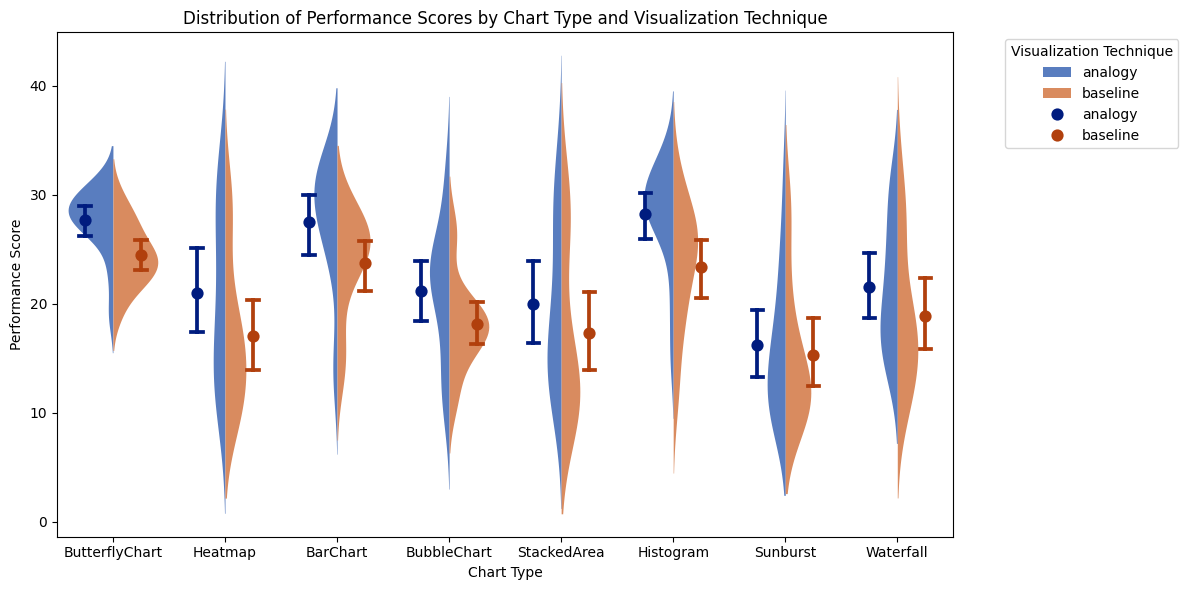

In [288]:

# Assume 'data' contains 'ChartType', 'PerformanceScore', and 'VisualizationTechnique'.

plt.figure(figsize=(12, 6))

# Plot Violin plot for the distribution
sns.violinplot(
    x='ChartType', 
    y='PerformanceScore', 
    hue='VisualizationTechnique', 
    data=data, 
    split=True, 
    inner=None,  # Remove the inner annotations for clarity
    palette='muted',
    linewidth=0
)

# Overlay the mean with 95% CI using Point Plot
sns.pointplot(
    x='ChartType', 
    y='PerformanceScore', 
    hue='VisualizationTechnique', 
    data=data, 
    dodge=0.5,  # Adjust to place points between the violins
    join=False,  # Only plot the points
    palette='dark', 
    ci=95,  # Show 95% confidence intervals
    markers='o',
    capsize=0.1  # Cap size for error bars
)

# Adjust legend and titles
plt.title('Distribution of Performance Scores by Chart Type and Visualization Technique')
plt.xlabel('Chart Type')
plt.ylabel('Performance Score')
plt.legend(title='Visualization Technique', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

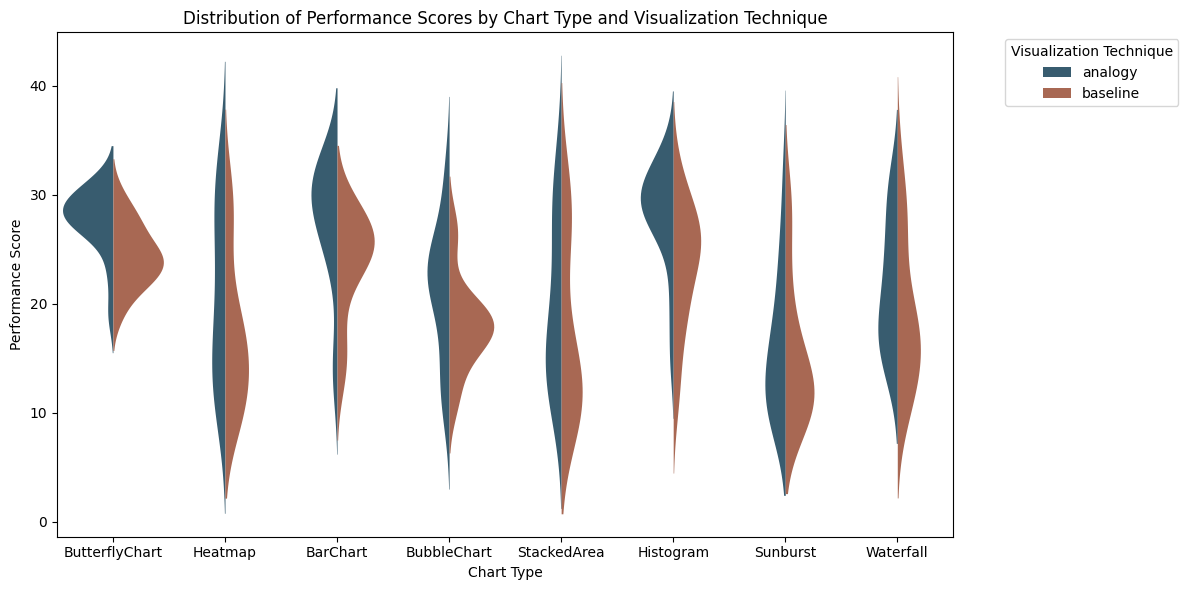

In [289]:
import seaborn as sns

# Custom color palette
palette = {
    'analogy': '#2f5f78',  # Color for analogy
    'baseline': '#b66145'  # Color for baseline
}

plt.figure(figsize=(12, 6))

# Plot Violin plot for the distribution
sns.violinplot(
    x='ChartType', 
    y='PerformanceScore', 
    hue='VisualizationTechnique', 
    data=data, 
    split=True, 
    inner=None,  # Remove the inner annotations for clarity
    palette=palette,
    linewidth=0,
    width=0.9
)

# Overlay the mean with 95% CI using Point Plot
# sns.pointplot(
#     x='ChartType', 
#     y='PerformanceScore', 
#     hue='VisualizationTechnique', 
#     data=data, 
#     dodge=0.5,  # Adjust to place points between the violins
#     join=False,  # Only plot the points
#     palette=palette, 
#     ci=95,  # Show 95% confidence intervals
#     markers='o',
#     capsize=0.1  # Cap size for error bars
# )

# Adjust legend and titles
plt.title('Distribution of Performance Scores by Chart Type and Visualization Technique')
plt.xlabel('Chart Type')
plt.ylabel('Performance Score')
plt.legend(title='Visualization Technique', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [290]:
import pandas as pd
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np

# Assume 'data' includes columns: 'PerformanceScore', 'ChartType', 'VisualizationTechnique'

# Calculate mean, SEM, and 95% confidence interval for each group
mean_ci_df = data.groupby(['ChartType', 'VisualizationTechnique'])['PerformanceScore'].agg(['mean', 'sem', 'size']).reset_index()

# Compute the 95% confidence interval
confidence_level = 0.95
alpha = 1 - confidence_level
mean_ci_df['95_ci'] = mean_ci_df['sem'] * stats.t.ppf(1 - alpha/2, mean_ci_df['size'] - 1)

# Print the calculated mean and 95% CI for each group
for index, row in mean_ci_df.iterrows():
    print(f"Chart Type: {row['ChartType']} | Visualization Technique: {row['VisualizationTechnique']}")
    print(f"Mean: {row['mean']:.3f}, 95% CI range: [{row['mean'] - row['95_ci']:.3f}, {row['mean'] + row['95_ci']:.3f}]")
    print("-" * 50)



Chart Type: BarChart | Visualization Technique: analogy
Mean: 27.500, 95% CI range: [24.339, 30.661]
--------------------------------------------------
Chart Type: BarChart | Visualization Technique: baseline
Mean: 23.688, 95% CI range: [21.123, 26.252]
--------------------------------------------------
Chart Type: BubbleChart | Visualization Technique: analogy
Mean: 21.188, 95% CI range: [17.930, 24.445]
--------------------------------------------------
Chart Type: BubbleChart | Visualization Technique: baseline
Mean: 18.125, 95% CI range: [15.942, 20.308]
--------------------------------------------------
Chart Type: ButterflyChart | Visualization Technique: analogy
Mean: 27.688, 95% CI range: [26.063, 29.312]
--------------------------------------------------
Chart Type: ButterflyChart | Visualization Technique: baseline
Mean: 24.438, 95% CI range: [22.906, 25.969]
--------------------------------------------------
Chart Type: Heatmap | Visualization Technique: analogy
Mean: 20.938

/var/folders/s3/gx423dyd2hg9sfb092jr70f00000gn/T/ipykernel_13262/3588202146.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(
/var/folders/s3/gx423dyd2hg9sfb092jr70f00000gn/T/ipykernel_13262/3588202146.py:4: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(


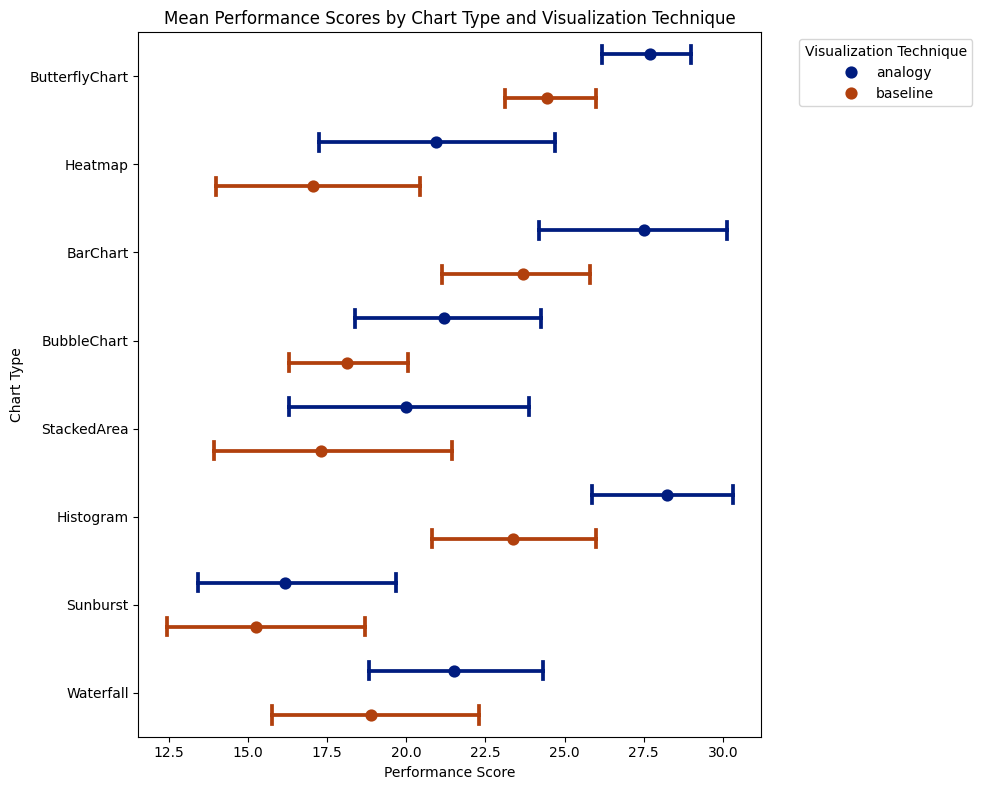

In [291]:
plt.figure(figsize=(10, 8))

# Use pointplot for horizontal plot of means with 95% confidence intervals
sns.pointplot(
    y='ChartType', 
    x='PerformanceScore', 
    hue='VisualizationTechnique', 
    data=data, 
    dodge=0.5,      # Separate the points for different techniques horizontally
    join=False,     # Do not join the points with lines
    palette='dark', # Dark palette for better contrast
    ci=95,          # Show 95% confidence intervals
    markers='o',    # Marker for the mean points
    capsize=0.2     # Error bar caps
)

# Customize the plot
plt.title('Mean Performance Scores by Chart Type and Visualization Technique')
plt.xlabel('Performance Score')
plt.ylabel('Chart Type')
plt.legend(title='Visualization Technique', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


/var/folders/s3/gx423dyd2hg9sfb092jr70f00000gn/T/ipykernel_13262/3819890386.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(
/var/folders/s3/gx423dyd2hg9sfb092jr70f00000gn/T/ipykernel_13262/3819890386.py:3: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(


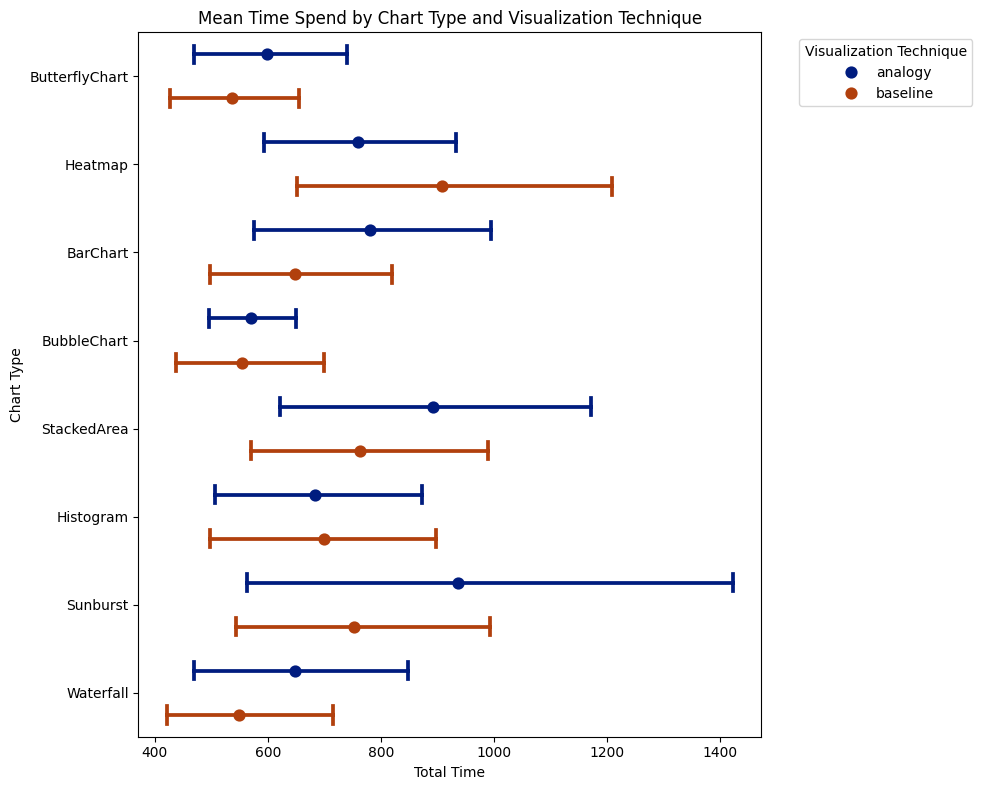

In [292]:
# similarly do it for time
plt.figure(figsize=(10, 8))
sns.pointplot(
    y='ChartType', 
    x='TotalTime', 
    hue='VisualizationTechnique', 
    data=data, 
    dodge=0.5,      # Separate the points for different techniques horizontally
    join=False,     # Do not join the points with lines
    palette='dark', # Dark palette for better contrast
    ci=95,          # Show 95% confidence intervals
    markers='o',    # Marker for the mean points
    capsize=0.2     # Error bar caps
)

# Customize the plot
plt.title('Mean Time Spend by Chart Type and Visualization Technique')
plt.xlabel('Total Time')
plt.ylabel('Chart Type')
plt.legend(title='Visualization Technique', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


/var/folders/s3/gx423dyd2hg9sfb092jr70f00000gn/T/ipykernel_13262/4127999837.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(
/var/folders/s3/gx423dyd2hg9sfb092jr70f00000gn/T/ipykernel_13262/4127999837.py:25: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(


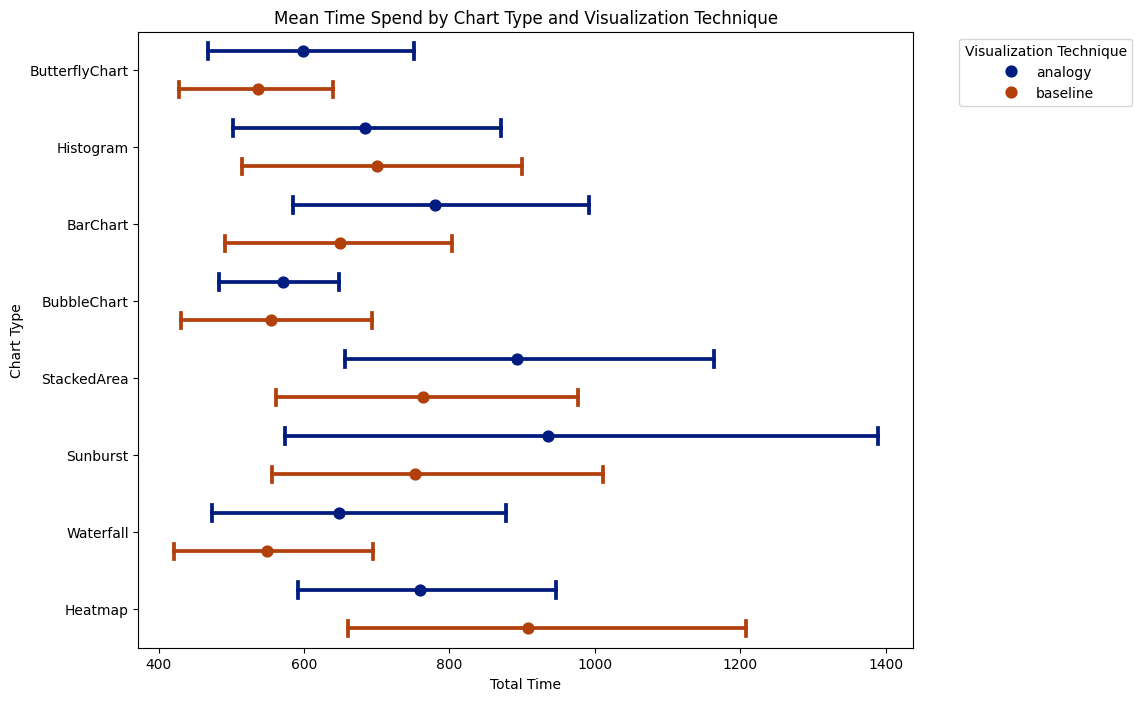

In [293]:
# do it in the order of BufferflyChart, Histogram, BarChart, BubbleChart, StackedArea, Histogram, Sunburst, Waterfall

# Create a dictionary to map the order of the chart types
chart_order = {
    'ButterflyChart': 1,
    'Histogram': 2,
    'BarChart': 3,
    'BubbleChart': 4,
    'StackedArea': 5,
    'Sunburst': 6,
    'Waterfall': 7
}

# Map the order to the 'ChartType' column

data['ChartOrder'] = data['ChartType'].map(chart_order)

# Sort the data based on the 'ChartOrder' column
data = data.sort_values('ChartOrder')

# plot the time spend

plt.figure(figsize=(10, 8))

sns.pointplot(
    y='ChartType', 
    x='TotalTime', 
    hue='VisualizationTechnique', 
    data=data, 
    dodge=0.5,      # Separate the points for different techniques horizontally
    join=False,     # Do not join the points with lines
    palette='dark', # Dark palette for better contrast
    ci=95,          # Show 95% confidence intervals
    markers='o',    # Marker for the mean points
    capsize=0.2     # Error bar caps
)

# Customize the plot

plt.title('Mean Time Spend by Chart Type and Visualization Technique')
plt.xlabel('Total Time')
plt.ylabel('Chart Type')
plt.legend(title='Visualization Technique', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [294]:
# print the mean and 95% CI for each group

mean_ci_df = data.groupby(['ChartType', 'VisualizationTechnique'])['TotalTime'].agg(['mean', 'sem', 'size']).reset_index()

# Compute the 95% confidence interval

confidence_level = 0.95
alpha = 1 - confidence_level

mean_ci_df['95_ci'] = mean_ci_df['sem'] * stats.t.ppf(1 - alpha/2, mean_ci_df['size'] - 1)

# Print the calculated mean and 95% CI for each group
for index, row in mean_ci_df.iterrows():
    print(f"Chart Type: {row['ChartType']} | Visualization Technique: {row['VisualizationTechnique']}")
    print(f"Mean: {row['mean']:.3f}, 95% CI range: [{row['mean'] - row['95_ci']:.3f}, {row['mean'] + row['95_ci']:.3f}]")
    print("-" * 50)
    
    

Chart Type: BarChart | Visualization Technique: analogy
Mean: 780.632, 95% CI range: [543.999, 1017.264]
--------------------------------------------------
Chart Type: BarChart | Visualization Technique: baseline
Mean: 648.997, 95% CI range: [475.489, 822.505]
--------------------------------------------------
Chart Type: BubbleChart | Visualization Technique: analogy
Mean: 570.460, 95% CI range: [482.086, 658.834]
--------------------------------------------------
Chart Type: BubbleChart | Visualization Technique: baseline
Mean: 553.893, 95% CI range: [407.769, 700.016]
--------------------------------------------------
Chart Type: ButterflyChart | Visualization Technique: analogy
Mean: 599.103, 95% CI range: [441.903, 756.303]
--------------------------------------------------
Chart Type: ButterflyChart | Visualization Technique: baseline
Mean: 537.358, 95% CI range: [412.784, 661.931]
--------------------------------------------------
Chart Type: Heatmap | Visualization Technique: a

In [295]:
# Assuming `data` is your DataFrame with 'ChartType', 'PerformanceScore', and 'VisualizationTechnique'

# Define function to calculate the confidence interval
from scipy import stats


def mean_confidence_interval(data, confidence=0.95):
    n = len(data)
    m = np.mean(data)
    sem = stats.sem(data)
    h = sem * stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

# Group by 'ChartType' and 'VisualizationTechnique' and apply the function
group_stats = data.groupby(['ChartType', 'VisualizationTechnique'])['PerformanceScore'].apply(mean_confidence_interval).reset_index()

# Split the results into separate columns for mean and confidence intervals
group_stats[['Mean', 'CI Lower', 'CI Upper']] = pd.DataFrame(group_stats['PerformanceScore'].tolist(), index=group_stats.index)

# Drop the original 'PerformanceScore' which is now split
group_stats = group_stats.drop(columns='PerformanceScore')

# Print the results
print(group_stats)


         ChartType VisualizationTechnique     Mean   CI Lower   CI Upper
0         BarChart                analogy  27.5000  24.338549  30.661451
1         BarChart               baseline  23.6875  21.122970  26.252030
2      BubbleChart                analogy  21.1875  17.930385  24.444615
3      BubbleChart               baseline  18.1250  15.941998  20.308002
4   ButterflyChart                analogy  27.6875  26.062852  29.312148
5   ButterflyChart               baseline  24.4375  22.905810  25.969190
6          Heatmap                analogy  20.9375  16.650386  25.224614
7          Heatmap               baseline  17.0625  13.419920  20.705080
8        Histogram                analogy  28.2500  25.687085  30.812915
9        Histogram               baseline  23.3750  20.336438  26.413562
10     StackedArea                analogy  20.0000  15.918585  24.081415
11     StackedArea               baseline  17.3125  13.002267  21.622733
12        Sunburst                analogy  16.1875 

In [296]:
from scipy.stats import ttest_ind

# Example assumed DataFrame 'data' that includes 'ChartType', 'PerformanceScore', and 'VisualizationTechnique'

# Function to perform t-test and print results
def perform_pairwise_t_tests(data):
    # Get unique chart types
    chart_types = data['ChartType'].unique()
    
    # Loop through each chart type and perform t-test
    for chart in chart_types:
        # Filter data for the specific chart type
        baseline_scores = data[(data['ChartType'] == chart) & (data['VisualizationTechnique'] == 'baseline')]['PerformanceScore']
        analogy_scores = data[(data['ChartType'] == chart) & (data['VisualizationTechnique'] == 'analogy')]['PerformanceScore']
        
        # Perform t-test (Welch's t-test assuming unequal variance)
        t_stat, p_value = ttest_ind(baseline_scores, analogy_scores, equal_var=False)
        
        # Print results
        print(f"Chart Type: {chart}")
        print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")
        print("Significant difference!" if p_value < 0.05 else "No significant difference.")
        print("-" * 50)

# Call the function
perform_pairwise_t_tests(data)

Chart Type: ButterflyChart
T-statistic: -3.102, P-value: 0.004
Significant difference!
--------------------------------------------------
Chart Type: Histogram
T-statistic: -2.614, P-value: 0.014
Significant difference!
--------------------------------------------------
Chart Type: BarChart
T-statistic: -1.996, P-value: 0.055
No significant difference.
--------------------------------------------------
Chart Type: BubbleChart
T-statistic: -1.665, P-value: 0.108
No significant difference.
--------------------------------------------------
Chart Type: StackedArea
T-statistic: -0.965, P-value: 0.342
No significant difference.
--------------------------------------------------
Chart Type: Sunburst
T-statistic: -0.405, P-value: 0.688
No significant difference.
--------------------------------------------------
Chart Type: Waterfall
T-statistic: -1.161, P-value: 0.255
No significant difference.
--------------------------------------------------
Chart Type: Heatmap
T-statistic: -1.468, P-valu

         ChartType VisualizationTechnique        Mean    CI Lower     CI Upper
0         BarChart                analogy  780.631750  543.999482  1017.264018
1         BarChart               baseline  648.996688  475.488783   822.504592
2      BubbleChart                analogy  570.460000  482.085767   658.834233
3      BubbleChart               baseline  553.892812  407.769383   700.016242
4   ButterflyChart                analogy  599.102750  441.902872   756.302628
5   ButterflyChart               baseline  537.357813  412.784433   661.931192
6          Heatmap                analogy  759.461625  567.109827   951.813423
7          Heatmap               baseline  907.389000  596.620897  1218.157103
8        Histogram                analogy  683.250000  476.188637   890.311363
9        Histogram               baseline  699.945688  473.356648   926.534727
10     StackedArea                analogy  892.833187  594.597767  1191.068608
11     StackedArea               baseline  763.62312

/var/folders/s3/gx423dyd2hg9sfb092jr70f00000gn/T/ipykernel_13262/3066813118.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(
/var/folders/s3/gx423dyd2hg9sfb092jr70f00000gn/T/ipykernel_13262/3066813118.py:13: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(


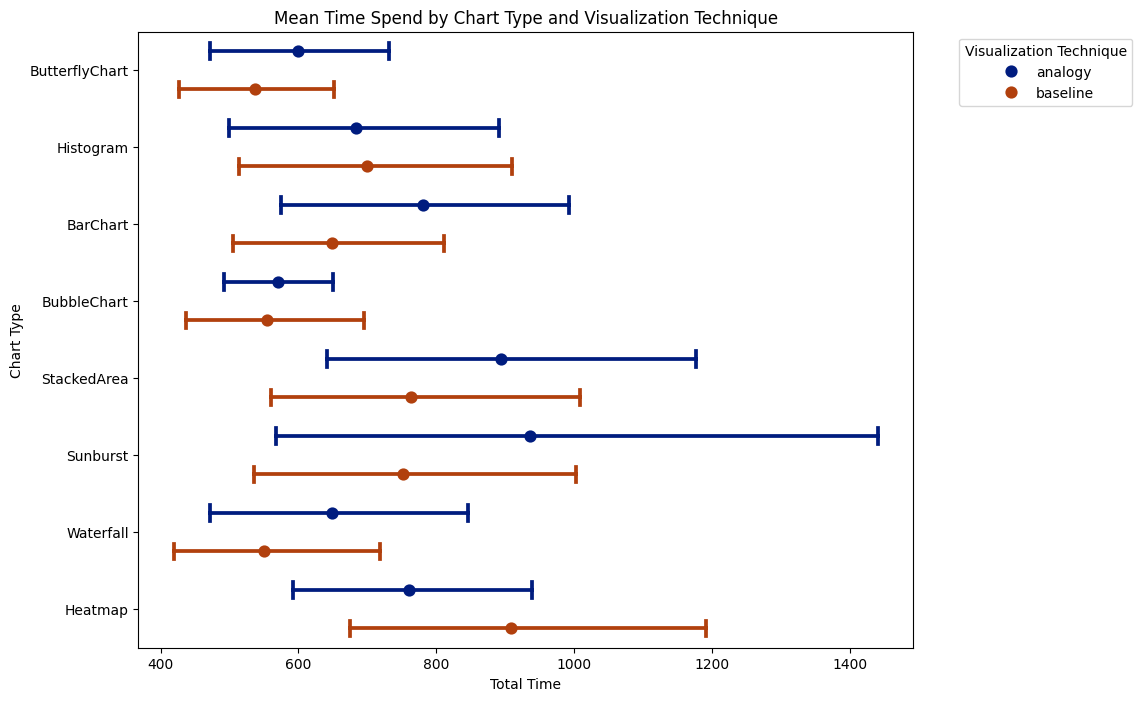

In [297]:
# get time for each chart type and plot in ci

# Group by 'ChartType' and 'VisualizationTechnique' and apply the function
group_stats = data.groupby(['ChartType', 'VisualizationTechnique'])['TotalTime'].apply(mean_confidence_interval).reset_index()
# Split the results into separate columns for mean and confidence intervals
group_stats[['Mean', 'CI Lower', 'CI Upper']] = pd.DataFrame(group_stats['TotalTime'].tolist(), index=group_stats.index)
# Drop the original 'TotalTime' which is now split
group_stats = group_stats.drop(columns='TotalTime')
# Print the results
print(group_stats)

plt.figure(figsize=(10, 8))
sns.pointplot(
    y='ChartType', 
    x='TotalTime', 
    hue='VisualizationTechnique', 
    data=data, 
    dodge=0.5,      # Separate the points for different techniques horizontally
    join=False,     # Do not join the points with lines
    palette='dark', # Dark palette for better contrast
    ci=95,          # Show 95% confidence intervals
    markers='o',    # Marker for the mean points
    capsize=0.2     # Error bar caps
)

# Customize the plot
plt.title('Mean Time Spend by Chart Type and Visualization Technique')
plt.xlabel('Total Time')
plt.ylabel('Chart Type')
plt.legend(title='Visualization Technique', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [298]:
def test_normality(group):
    stat, p = shapiro(group)
    return p

normality = data.groupby(['ChartType', 'VisualizationTechnique'])['PerformanceScore'].apply(test_normality).reset_index()
normality.columns = ['ChartType', 'VisualizationTechnique', 'Normality_pvalue']
print(normality)


         ChartType VisualizationTechnique  Normality_pvalue
0         BarChart                analogy          0.002877
1         BarChart               baseline          0.016450
2      BubbleChart                analogy          0.318351
3      BubbleChart               baseline          0.073360
4   ButterflyChart                analogy          0.006408
5   ButterflyChart               baseline          0.985588
6          Heatmap                analogy          0.112340
7          Heatmap               baseline          0.019813
8        Histogram                analogy          0.006089
9        Histogram               baseline          0.440593
10     StackedArea                analogy          0.150982
11     StackedArea               baseline          0.002830
12        Sunburst                analogy          0.023372
13        Sunburst               baseline          0.001465
14       Waterfall                analogy          0.133253
15       Waterfall               baselin

In [299]:
# normal data

# apply correction for multiple comparisons
# Bonferroni correction


anova_results = []

for chart in data['ChartType'].unique():
    group_data = data[data['ChartType'] == chart]
    groups = [group_data[group_data['VisualizationTechnique'] == vt]['PerformanceScore'] for vt in group_data['VisualizationTechnique'].unique()]
    stat, p = f_oneway(*groups)
    anova_results.append({'ChartType': chart, 'ANOVA_Stat': stat, 'p_value': p})

anova_df = pd.DataFrame(anova_results)
print(anova_df)

# Check which ones are significant (p < 0.05)
significant_charts = anova_df[anova_df['p_value'] < 0.05]
print("Significant differences found for charts:", significant_charts['ChartType'].tolist())


        ChartType  ANOVA_Stat   p_value
0  ButterflyChart    9.625059  0.004159
1       Histogram    6.832884  0.013860
2        BarChart    3.984793  0.055059
3     BubbleChart    2.771451  0.106371
4     StackedArea    0.931236  0.342257
5        Sunburst    0.164098  0.688286
6       Waterfall    1.346976  0.254960
7         Heatmap    2.155514  0.152467
Significant differences found for charts: ['ButterflyChart', 'Histogram']


In [300]:
chart_mean_scores = data.groupby('ChartType')['PerformanceScore'].mean().reset_index()
scores = chart_mean_scores['PerformanceScore'].values.reshape(-1, 1)

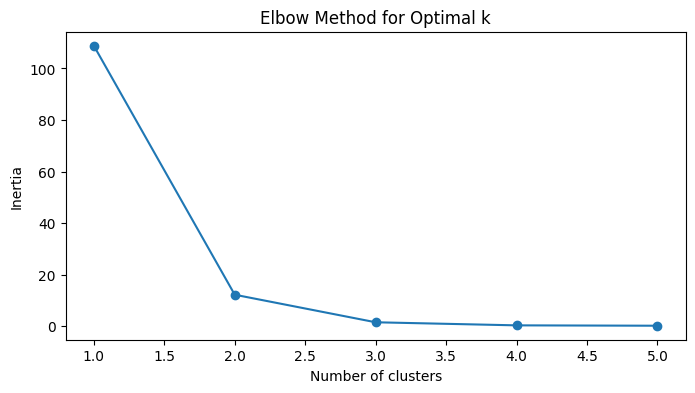

In [301]:
inertia = []
K = range(1, 6)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1).fit(scores)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [302]:
chart_mean_scores = data.groupby('ChartType')['PerformanceScore'].mean().reset_index()
scores = chart_mean_scores['PerformanceScore'].values.reshape(-1, 1)

# Fit K-Means with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=1)
chart_mean_scores['Cluster'] = kmeans.fit_predict(scores)

# Assign cluster labels to reflect difficulty. Determine order by examining the cluster means.
mean_cluster_scores = chart_mean_scores.groupby('Cluster')['PerformanceScore'].mean().sort_values()
sorted_clusters = mean_cluster_scores.index.tolist()

# Assign labels based on cluster means (ensure logical assignment based on your data understanding)
difficulty_labels = {sorted_clusters[0]: 'Hard', sorted_clusters[1]: 'Easy'}

# Map these labels onto the ChartType mean scores DataFrame
chart_mean_scores['DifficultyLevel'] = chart_mean_scores['Cluster'].map(difficulty_labels)

# Print the result for verification
print(chart_mean_scores)

# Update the existing 'ChartDifficulties' column in the main data DataFrame
data['ChartDifficulties'] = data['ChartType'].map(chart_mean_scores.set_index('ChartType')['DifficultyLevel'])

# Verify that the integration worked
print(data[['ChartType', 'ChartDifficulties']].drop_duplicates())


        ChartType  PerformanceScore  Cluster DifficultyLevel
0        BarChart          25.59375        1            Easy
1     BubbleChart          19.65625        0            Hard
2  ButterflyChart          26.06250        1            Easy
3         Heatmap          19.00000        0            Hard
4       Histogram          25.81250        1            Easy
5     StackedArea          18.65625        0            Hard
6        Sunburst          15.71875        0            Hard
7       Waterfall          20.18750        0            Hard
          ChartType ChartDifficulties
0    ButterflyChart              Easy
118       Histogram              Easy
105        BarChart              Easy
179     BubbleChart              Hard
10      StackedArea              Hard
214        Sunburst              Hard
239       Waterfall              Hard
4           Heatmap              Hard


In [303]:
# mixed effect model
data['VisualizationTechnique'] = data['VisualizationTechnique'].astype('category')
data['VisualizationTechnique'] = data['VisualizationTechnique'].cat.reorder_categories(['baseline', 'analogy'], ordered=True)
data['Order'] = data['Order'].astype('category')
data['ChartDifficulties'] = data['ChartDifficulties'].astype('category')
data['PROLIFIC_PID'] = data['PROLIFIC_PID'].astype('category')

# Define the model formula
formula = 'PerformanceScore ~ VisualizationTechnique * ChartDifficulties + Order + TotalTime'

# Fit the mixed-effects model
md = smf.mixedlm(formula, data, groups=data['PROLIFIC_PID'])
mdf = md.fit()
print(mdf.summary())

                                Mixed Linear Model Regression Results
Model:                          MixedLM              Dependent Variable:              PerformanceScore
No. Observations:               256                  Method:                          REML            
No. Groups:                     128                  Scale:                           10.1459         
Min. group size:                2                    Log-Likelihood:                  -777.6425       
Max. group size:                2                    Converged:                       Yes             
Mean group size:                2.0                                                                   
------------------------------------------------------------------------------------------------------
                                                            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------------------------------------
Int

In [304]:
p_values = mdf.pvalues
print(p_values)

Intercept                                                      3.306349e-103
VisualizationTechnique[T.analogy]                               7.771269e-10
ChartDifficulties[T.Hard]                                       4.417581e-09
Order[T.second]                                                 3.691674e-03
VisualizationTechnique[T.analogy]:ChartDifficulties[T.Hard]     1.024650e-01
TotalTime                                                       5.264903e-01
Group Var                                                       2.776530e-06
dtype: float64


In [305]:
#interpretation:

# fixed effects corefficients:

# technqiue: highly significant, analogy has a higher performance score than baseline, in average is 4/35 higher (11%)
# difficulty: highly significant, easy charts has a higher performance score than hard, in average is 6.7/35 higher (19%)
# Order: significant, second order has a higher performance score than first, in average is 1.4/35 higher (4%)
# Time, and others, not significant


  ChartDifficulties       mean       std
0              Easy  25.822917  4.992615
1              Hard  18.643750  6.895762


/var/folders/s3/gx423dyd2hg9sfb092jr70f00000gn/T/ipykernel_13262/638252405.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  score_stats = data.groupby('ChartDifficulties')['PerformanceScore'].agg(['mean', 'std']).reset_index()


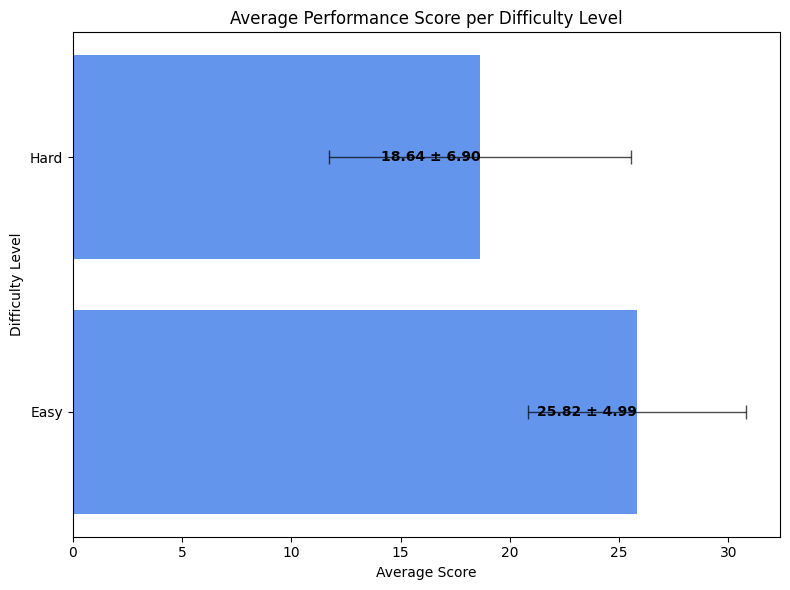

  ChartDifficulties        mean         std
0              Easy  658.214115  358.646865
1              Hard  733.307956  496.333219


/var/folders/s3/gx423dyd2hg9sfb092jr70f00000gn/T/ipykernel_13262/638252405.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_stats = data.groupby('ChartDifficulties')['TotalTime'].agg(['mean', 'std']).reset_index()


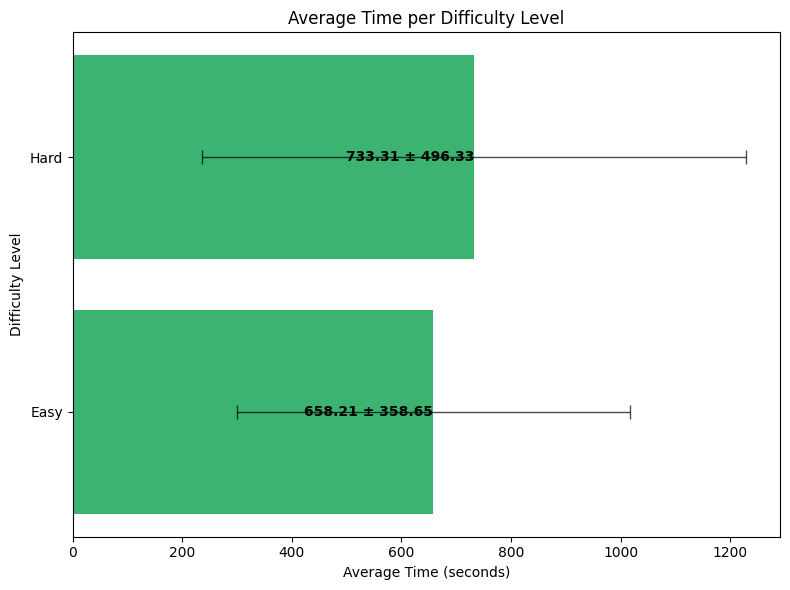

In [306]:
# Calculate mean and standard deviation for each difficulty level for scores
score_stats = data.groupby('ChartDifficulties')['PerformanceScore'].agg(['mean', 'std']).reset_index()

print(score_stats)

# Plot Score Horizontal Bar Chart with Error Bars using Matplotlib directly
plt.figure(figsize=(8, 6))
plt.barh(score_stats['ChartDifficulties'], score_stats['mean'], color="cornflowerblue", 
         xerr=score_stats['std'], capsize=5, error_kw={'elinewidth':1, 'alpha':0.7})

plt.title('Average Performance Score per Difficulty Level')
plt.xlabel('Average Score')
plt.ylabel('Difficulty Level')

# Annotate with mean and standard deviation
for index, row in score_stats.iterrows():
    plt.text(row['mean'], index, f"{row['mean']:.2f} ± {row['std']:.2f}", 
             color='black', va='center', ha='right', fontweight='bold')

plt.tight_layout()
plt.show()

# Calculate mean and standard deviation for each difficulty level for time
time_stats = data.groupby('ChartDifficulties')['TotalTime'].agg(['mean', 'std']).reset_index()

print(time_stats)

# Plot Time Horizontal Bar Chart with Error Bars using Matplotlib directly
plt.figure(figsize=(8, 6))
plt.barh(time_stats['ChartDifficulties'], time_stats['mean'], color="mediumseagreen", 
         xerr=time_stats['std'], capsize=5, error_kw={'elinewidth':1, 'alpha':0.7})

plt.title('Average Time per Difficulty Level')
plt.xlabel('Average Time (seconds)')
plt.ylabel('Difficulty Level')

# Annotate with mean and standard deviation
for index, row in time_stats.iterrows():
    plt.text(row['mean'], index, f"{row['mean']:.2f} ± {row['std']:.2f}", 
             color='black', va='center', ha='right', fontweight='bold')

plt.tight_layout()
plt.show()


In [307]:
# average time by analogy and baseline

# Calculate mean and standard deviation for each visualization technique for time
time_stats = data.groupby('VisualizationTechnique')['TotalTime'].agg(['mean', 'std']).reset_index()

print(time_stats)

  VisualizationTechnique        mean         std
0               baseline  676.570508  410.689086
1                analogy  733.725023  486.814308


/var/folders/s3/gx423dyd2hg9sfb092jr70f00000gn/T/ipykernel_13262/2396682138.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_stats = data.groupby('VisualizationTechnique')['TotalTime'].agg(['mean', 'std']).reset_index()


/var/folders/s3/gx423dyd2hg9sfb092jr70f00000gn/T/ipykernel_13262/2524528049.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PerformanceScore', y='ChartDifficulties', data=data, palette="Blues", orient='h')


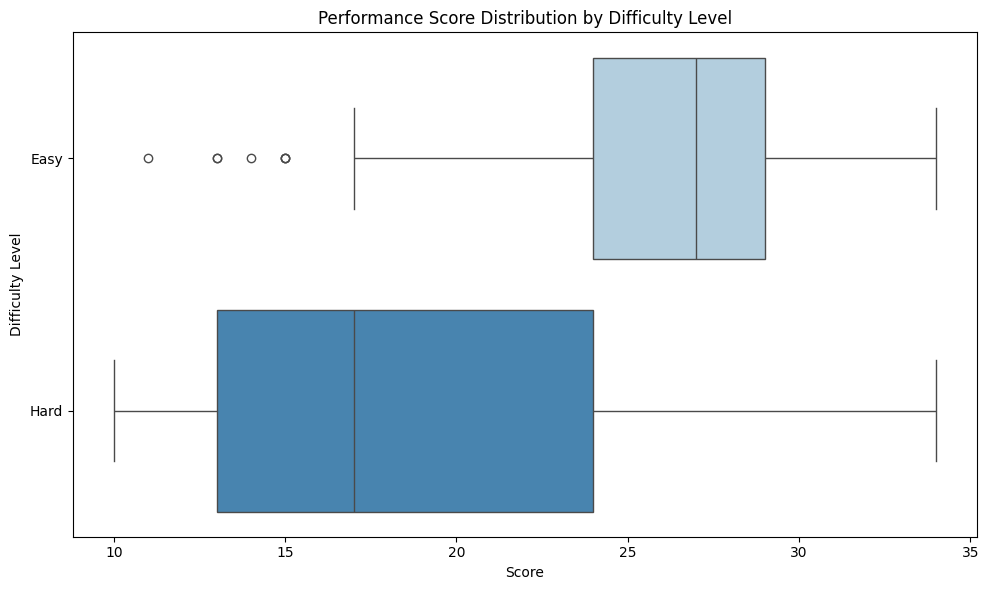

/var/folders/s3/gx423dyd2hg9sfb092jr70f00000gn/T/ipykernel_13262/2524528049.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TotalTime', y='ChartDifficulties', data=data, palette="Greens", orient='h')


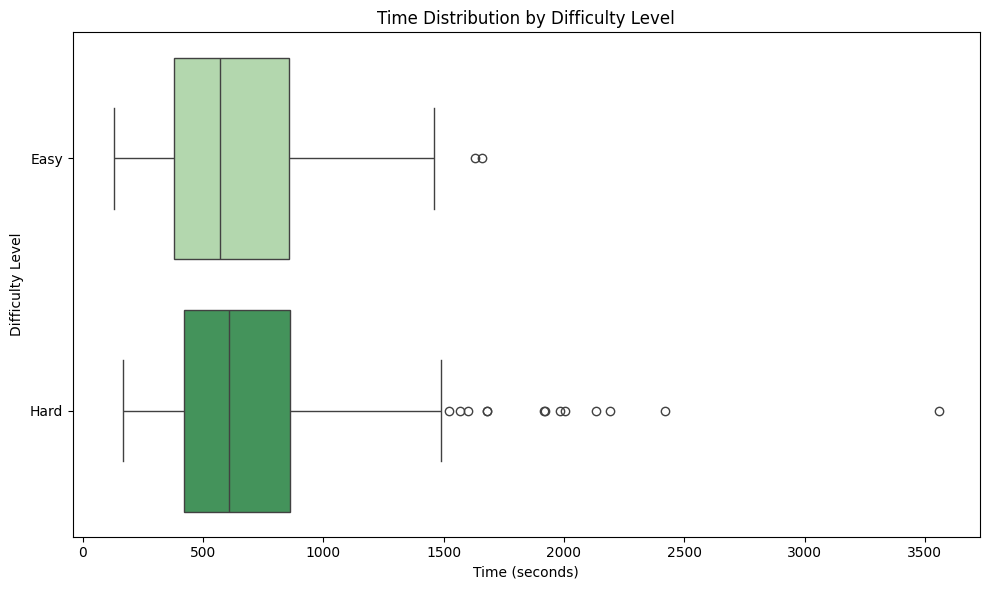

In [308]:
# maybe boxplots are better to plot these?

# Plot Score Boxplot by Difficulty Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='PerformanceScore', y='ChartDifficulties', data=data, palette="Blues", orient='h')
plt.title('Performance Score Distribution by Difficulty Level')
plt.xlabel('Score')
plt.ylabel('Difficulty Level')
plt.tight_layout()
plt.show()

# Plot Time Boxplot by Difficulty Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='TotalTime', y='ChartDifficulties', data=data, palette="Greens", orient='h')
plt.title('Time Distribution by Difficulty Level')
plt.xlabel('Time (seconds)')
plt.ylabel('Difficulty Level')
plt.tight_layout()
plt.show()


In [309]:
# Assuming 'data' contains the necessary columns: 'VisualizationTechnique', 'ChartDifficulties', and 'Score'
# Calculate the mean and standard deviation for each combination of technique and difficulty
group_stats = data.groupby(['VisualizationTechnique', 'ChartDifficulties'])['PerformanceScore'].agg(['mean', 'std']).reset_index()

# Print the results
print(group_stats)


  VisualizationTechnique ChartDifficulties       mean       std
0               baseline              Easy  23.833333  4.539816
1               baseline              Hard  17.325000  6.540574
2                analogy              Easy  27.812500  4.656984
3                analogy              Hard  19.962500  7.028772


/var/folders/s3/gx423dyd2hg9sfb092jr70f00000gn/T/ipykernel_13262/1250290320.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_stats = data.groupby(['VisualizationTechnique', 'ChartDifficulties'])['PerformanceScore'].agg(['mean', 'std']).reset_index()


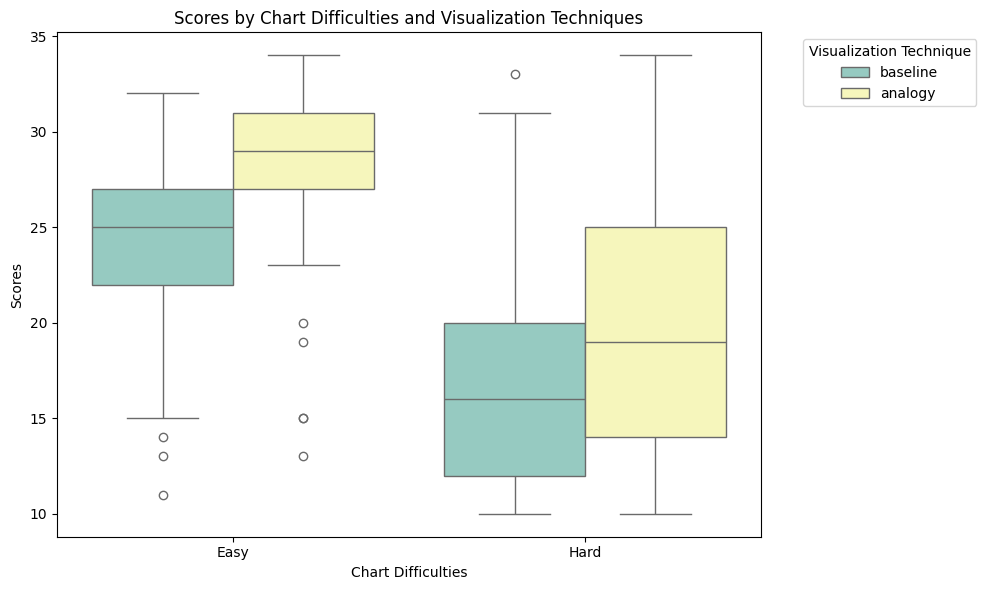

In [310]:
plt.figure(figsize=(10, 6))

# Create the boxplot
sns.boxplot(
    x='ChartDifficulties', 
    y='PerformanceScore', 
    hue='VisualizationTechnique', 
    data=data, 
    palette="Set3"
)

# Add title and labels
plt.title('Scores by Chart Difficulties and Visualization Techniques')
plt.xlabel('Chart Difficulties')
plt.ylabel('Scores')

# Place the legend
plt.legend(title='Visualization Technique', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

In [311]:
# if no grouping into easy and hard

# Calculate the mean and standard deviation for each combination of technique and difficulty

group_stats = data.groupby(['VisualizationTechnique'])['PerformanceScore'].agg(['mean', 'std']).reset_index()

# Print the results

print(group_stats)




  VisualizationTechnique       mean       std
0               baseline  19.765625  6.651605
1                analogy  22.906250  7.301642


/var/folders/s3/gx423dyd2hg9sfb092jr70f00000gn/T/ipykernel_13262/1515514094.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_stats = data.groupby(['VisualizationTechnique'])['PerformanceScore'].agg(['mean', 'std']).reset_index()


In [312]:
# get p values for analogy vs baseline, ANOVA

# Perform ANOVA to compare the means of the two groups

baseline_scores = data[data['VisualizationTechnique'] == 'baseline']['PerformanceScore']
analogy_scores = data[data['VisualizationTechnique'] == 'analogy']['PerformanceScore']

stat, p = f_oneway(baseline_scores, analogy_scores)

print(f"ANOVA Statistic: {stat:.3f}")
print(f"P-value: {p:.6f}")



ANOVA Statistic: 12.941
P-value: 0.000386


In [313]:
# Assuming data is the DataFrame object with your data

# Extract scores by technique and difficulty
easy_baseline_scores = data[
    (data['ChartDifficulties'] == 'Easy') &
    (data['VisualizationTechnique'] == 'baseline')
]['PerformanceScore']

easy_analogy_scores = data[
    (data['ChartDifficulties'] == 'Easy') &
    (data['VisualizationTechnique'] == 'analogy')
]['PerformanceScore']

hard_baseline_scores = data[
    (data['ChartDifficulties'] == 'Hard') &
    (data['VisualizationTechnique'] == 'baseline')
]['PerformanceScore']

hard_analogy_scores = data[
    (data['ChartDifficulties'] == 'Hard') &
    (data['VisualizationTechnique'] == 'analogy')
]['PerformanceScore']

In [314]:
mean_easy_baseline = easy_baseline_scores.mean()
std_easy_baseline = easy_baseline_scores.std()
mean_easy_analogy = easy_analogy_scores.mean()
std_easy_analogy = easy_analogy_scores.std()

mean_hard_baseline = hard_baseline_scores.mean()
std_hard_baseline = hard_baseline_scores.std()
mean_hard_analogy = hard_analogy_scores.mean()
std_hard_analogy = hard_analogy_scores.std()

# Print Mean differences
print(f"Easy Baseline Mean: {mean_easy_baseline}, Std: {std_easy_baseline}")
print(f"Easy Analogy Mean: {mean_easy_analogy}, Std: {std_easy_analogy}")
print(f"Hard Baseline Mean: {mean_hard_baseline}, Std: {std_hard_baseline}")
print(f"Hard Analogy Mean: {mean_hard_analogy}, Std: {std_hard_analogy}")



Easy Baseline Mean: 23.833333333333332, Std: 4.539815974025179
Easy Analogy Mean: 27.8125, Std: 4.656984002549289
Hard Baseline Mean: 17.325, Std: 6.540574433797893
Hard Analogy Mean: 19.9625, Std: 7.028772242753803


In [315]:
# Perform t-tests comparing baseline and analogy for easy and hard difficulties

# Easy difficulty
t_stat_easy, p_val_easy = ttest_ind(easy_baseline_scores, easy_analogy_scores)
print(f"T-test Easy Baseline vs Analogy - t-statistic: {t_stat_easy}, p-value: {p_val_easy}")

# Hard difficulty
t_stat_hard, p_val_hard = ttest_ind(hard_baseline_scores, hard_analogy_scores)
print(f"T-test Hard Baseline vs Analogy - t-statistic: {t_stat_hard}, p-value: {p_val_hard}")

T-test Easy Baseline vs Analogy - t-statistic: -4.238925297898871, p-value: 5.2468134356650886e-05
T-test Hard Baseline vs Analogy - t-statistic: -2.4570422498149487, p-value: 0.015090108672707957


In [316]:
# Assuming 'data' contains the columns: 'VisualizationTechnique', 'ChartDifficulties', 'Order', and 'Score'
# Calculate the mean and standard deviation for each combination of technique, difficulty, and order
group_stats = data.groupby(['VisualizationTechnique', 'ChartDifficulties', 'Order'])['PerformanceScore'].agg(['mean', 'std']).reset_index()

# Print the results
print(group_stats)

  VisualizationTechnique ChartDifficulties   Order       mean       std
0               baseline              Easy   first  21.916667  5.166082
1               baseline              Easy  second  25.750000  2.785834
2               baseline              Hard   first  15.825000  5.642728
3               baseline              Hard  second  18.825000  7.085151
4                analogy              Easy   first  27.958333  4.267971
5                analogy              Easy  second  27.666667  5.104701
6                analogy              Hard   first  20.075000  7.043409
7                analogy              Hard  second  19.850000  7.102004


/var/folders/s3/gx423dyd2hg9sfb092jr70f00000gn/T/ipykernel_13262/2222950981.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_stats = data.groupby(['VisualizationTechnique', 'ChartDifficulties', 'Order'])['PerformanceScore'].agg(['mean', 'std']).reset_index()


In [317]:
# learning transfer (performance score)

# standalone check

analogy_first_exposure = data[
    (data['VisualizationTechnique'] == 'analogy') & 
    (data['Order'] == 'first')
]['PerformanceScore']

analogy_after_baseline = data[
    (data['VisualizationTechnique'] == 'analogy') & 
    (data['Order'] == 'second')
]['PerformanceScore']



In [318]:
mean_first = analogy_first_exposure.mean()
std_first = analogy_first_exposure.std()
mean_second = analogy_after_baseline.mean()
std_second = analogy_after_baseline.std()

print(f"Analogy First Exposure Mean: {mean_first}, Std: {std_first}")
print(f"Analogy After Baseline Mean: {mean_second}, Std: {std_second}")

Analogy First Exposure Mean: 23.03125, Std: 7.222031438261543
Analogy After Baseline Mean: 22.78125, Std: 7.435369676231453


In [319]:
# print 95% confidence interval

print(mean_confidence_interval(analogy_first_exposure))
print(mean_confidence_interval(analogy_after_baseline))

(np.float64(23.03125), np.float64(21.227240222195324), np.float64(24.835259777804676))
(np.float64(22.78125), np.float64(20.92394991591967), np.float64(24.63855008408033))


In [320]:
from scipy.stats import ttest_ind, mannwhitneyu, shapiro, levene

# Shapiro-Wilk Test for Normality
shapiro_first = shapiro(analogy_first_exposure)
shapiro_second = shapiro(analogy_after_baseline)

# Levene's Test for Equality of Variances
levene_test = levene(analogy_first_exposure, analogy_after_baseline)

# Perform tests based on the assumptions
if shapiro_first.pvalue > 0.05 and shapiro_second.pvalue > 0.05 and levene_test.pvalue > 0.05:
    # T-Test
    t_stat, p_val = ttest_ind(analogy_first_exposure, analogy_after_baseline)
else:
    # Mann-Whitney
    t_stat, p_val = mannwhitneyu(analogy_first_exposure, analogy_after_baseline)

print(f"T-statistic: {t_stat}, p-value: {p_val}")

T-statistic: 2067.0, p-value: 0.9296466794021244


In [321]:
# now sure the analogy chart performs similarly whether or not participants have seen the actual chart first.


In [322]:
# transfer of learning 

actual_after_analogy = data[
    (data['VisualizationTechnique'] == 'baseline') & 
    (data['Order'] == 'second')
]['PerformanceScore']

actual_first_exposure = data[
    (data['VisualizationTechnique'] == 'baseline') & 
    (data['Order'] == 'first')
]['PerformanceScore']

mean_actual_after_analogy = actual_after_analogy.mean()
std_actual_after_analogy = actual_after_analogy.std()
mean_actual_first_exposure = actual_first_exposure.mean()
std_actual_first_exposure = actual_first_exposure.std()

print(f"Actual After Analogy Mean: {mean_actual_after_analogy}, Std: {std_actual_after_analogy}")
print(f"Actual First Exposure Mean: {mean_actual_first_exposure}, Std: {std_actual_first_exposure}")

Actual After Analogy Mean: 21.421875, Std: 6.732542828419878
Actual First Exposure Mean: 18.109375, Std: 6.18784570943794


In [323]:
# also print the 95% ci

print(f"Actual After Analogy 95% CI: {mean_confidence_interval(actual_after_analogy)}")
print(f"Actual First Exposure 95% CI: {mean_confidence_interval(actual_first_exposure)}")

Actual After Analogy 95% CI: (np.float64(21.421875), np.float64(19.740135838963912), np.float64(23.103614161036088))
Actual First Exposure 95% CI: (np.float64(18.109375), np.float64(16.563697130995894), np.float64(19.655052869004106))


In [324]:
# Shapiro-Wilk Test for Normality
shapiro_actual_first = shapiro(actual_first_exposure)
shapiro_actual_after = shapiro(actual_after_analogy)

# Levene's Test for Equality of Variances
levene_actual = levene(actual_first_exposure, actual_after_analogy)

# Perform tests based on the assumptions
if shapiro_actual_first.pvalue > 0.05 and shapiro_actual_after.pvalue > 0.05 and levene_actual.pvalue > 0.05:
    # T-Test
    t_stat, p_val = ttest_ind(actual_first_exposure, actual_after_analogy)
else:
    # Mann-Whitney
    t_stat, p_val = mannwhitneyu(actual_first_exposure, actual_after_analogy)

print(f"T-statistic: {t_stat}, p-value: {p_val}")


T-statistic: 1477.5, p-value: 0.006515679453275888


In [325]:
# significant !!!

/var/folders/s3/gx423dyd2hg9sfb092jr70f00000gn/T/ipykernel_13262/2275504391.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(
/var/folders/s3/gx423dyd2hg9sfb092jr70f00000gn/T/ipykernel_13262/2275504391.py:19: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(


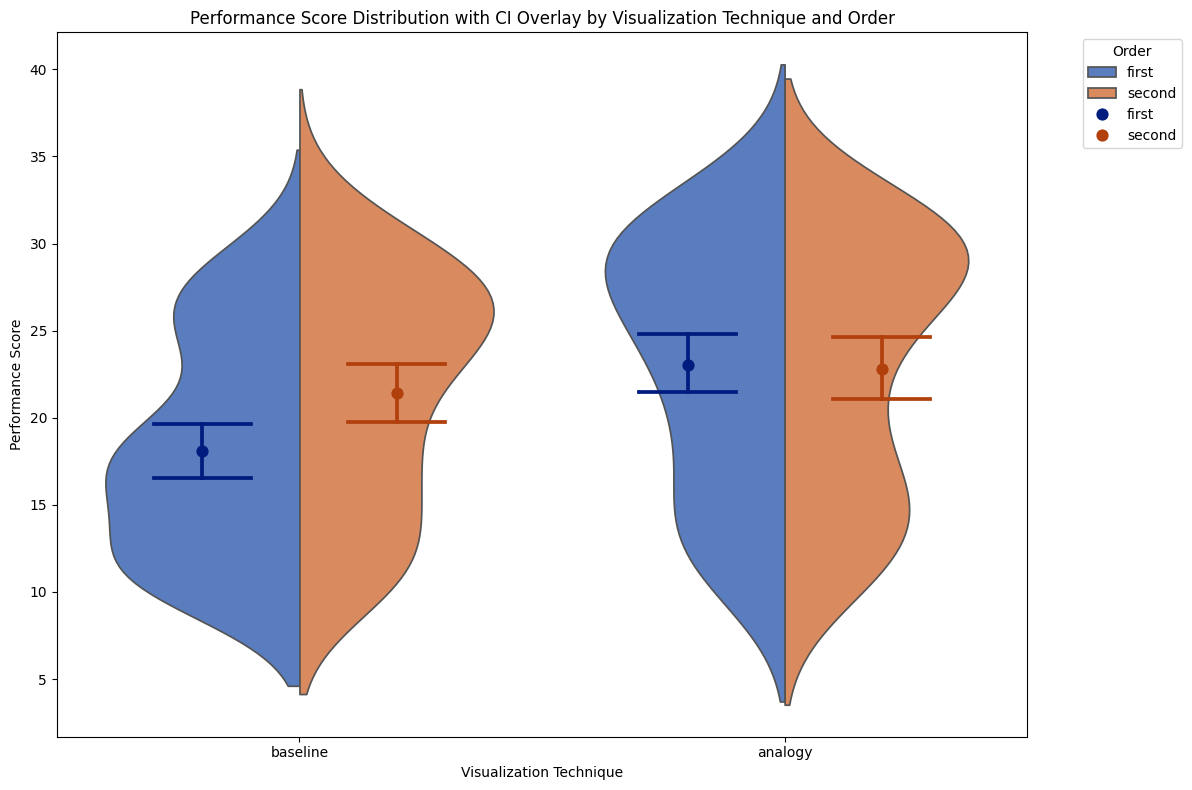

In [326]:
import seaborn as sns

# Assume 'data' includes columns: 'PerformanceScore', 'VisualizationTechnique', and 'Order'

plt.figure(figsize=(12, 8))

# Create a violin plot showing the distribution of scores
sns.violinplot(
    x='VisualizationTechnique', 
    y='PerformanceScore', 
    hue='Order', 
    data=data, 
    split=True, 
    inner=None,  # Do not show inner data points
    palette='muted'
)

# Overlay the means with 95% confidence intervals using a point plot
sns.pointplot(
    x='VisualizationTechnique', 
    y='PerformanceScore', 
    hue='Order', 
    data=data, 
    dodge=0.4,       # Separate the points horizontally
    markers='o',     # Shape of the marker
    join=False,      # Do not join with lines, just points
    palette='dark',  # Use a different palette for contrast
    ci=95,           # Show 95% confidence intervals
    capsize=0.2      # Cap size for error bars
)

# Customize the plot
plt.title('Performance Score Distribution with CI Overlay by Visualization Technique and Order')
plt.xlabel('Visualization Technique')
plt.ylabel('Performance Score')
plt.legend(title='Order', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


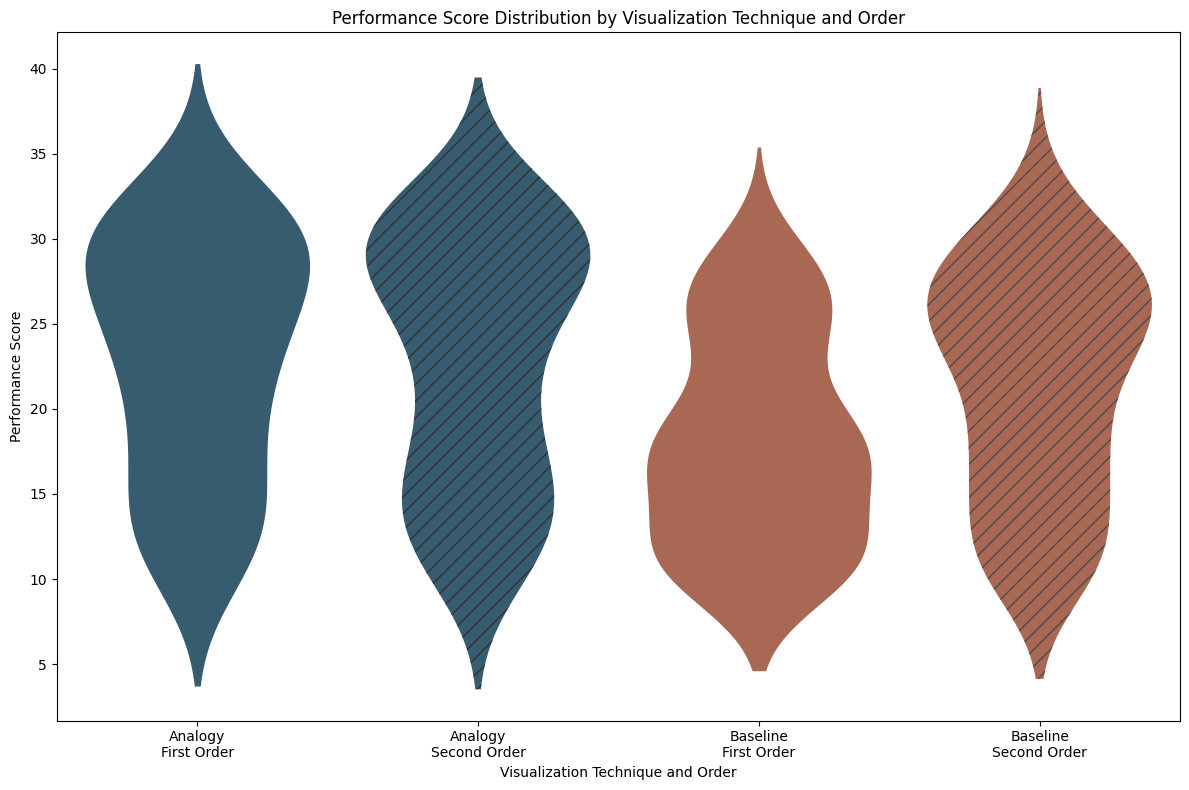

In [327]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import colorsys

def adjust_color_lightness(color, amount=1.0):
    """
    Adjust the lightness of a color.
    :param color: Hex string of the color.
    :param amount: Factor to adjust lightness (>1 to lighten, <1 to darken).
    :return: Adjusted color as a hex string.
    """
    try:
        c = mcolors.cnames[color]
    except KeyError:
        c = color
    rgb = mcolors.to_rgb(c)
    hls = colorsys.rgb_to_hls(*rgb)
    adjusted_lightness = max(0, min(1, hls[1] * amount))
    adjusted_rgb = colorsys.hls_to_rgb(hls[0], adjusted_lightness, hls[2])
    return mcolors.to_hex(adjusted_rgb)

# Assume 'data' includes columns: 'PerformanceScore', 'VisualizationTechnique', and 'Order'

# Convert 'VisualizationTechnique' and 'Order' columns to string before concatenation
data['TechniqueOrder'] = data['VisualizationTechnique'].astype(str) + '_' + data['Order'].astype(str)

# Define the order for plotting
order = ['analogy_first', 'analogy_second', 'baseline_first', 'baseline_second']

# Base colors for techniques
base_colors = {
    'analogy': '#2f5f78',
    'baseline': '#b66145'
}

# Define colors with 50% opacity and adjust for 'second' order
technique_order_colors = {
    'analogy_first': mcolors.to_rgba(adjust_color_lightness(base_colors['analogy'], amount=1), alpha=0.5),
    'analogy_second': mcolors.to_rgba(adjust_color_lightness(base_colors['analogy'], amount=1), alpha=0.5),
    'baseline_first': mcolors.to_rgba(adjust_color_lightness(base_colors['baseline'], amount=1), alpha=0.5),
    'baseline_second': mcolors.to_rgba(adjust_color_lightness(base_colors['baseline'], amount=1), alpha=0.5)
}

# Mapping for readable labels
label_mapping = {
    'analogy_first': 'Analogy\nFirst Order',
    'analogy_second': 'Analogy\nSecond Order',
    'baseline_first': 'Baseline\nFirst Order',
    'baseline_second': 'Baseline\nSecond Order'
}

# Prepare the plot
plt.figure(figsize=(12, 8))

# Plot each violin individually
positions = range(len(order))  # Positions on the x-axis
for idx, tech_order in enumerate(order):
    subset = data[data['TechniqueOrder'] == tech_order]
    sns.violinplot(
        x='TechniqueOrder',
        y='PerformanceScore',
        data=subset,
        color=technique_order_colors[tech_order],
        inner=None,
        width=0.8,
        linewidth=0,
        order=[tech_order]  # Ensure the correct order,
    )
    if idx % 2 != 0:
        plt.gca().collections[-1].set_hatch('//')

# Set x-ticks and labels
plt.xticks(positions, [label_mapping[tech_order] for tech_order in order])

plt.xlabel('Visualization Technique and Order')
plt.ylabel('Performance Score')
plt.title('Performance Score Distribution by Visualization Technique and Order')

plt.tight_layout()
plt.show()

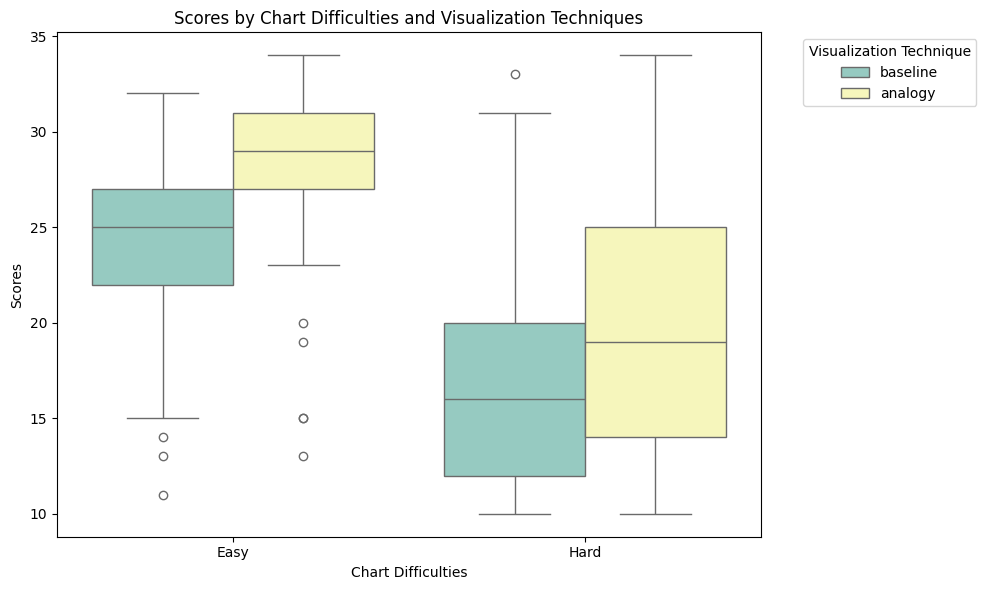

In [328]:
plt.figure(figsize=(10, 6))

# Create the boxplot
sns.boxplot(
    x='ChartDifficulties', 
    y='PerformanceScore', 
    hue='VisualizationTechnique', 
    data=data, 
    palette="Set3"
)

# Add title and labels
plt.title('Scores by Chart Difficulties and Visualization Techniques')
plt.xlabel('Chart Difficulties')
plt.ylabel('Scores')

# Place the legend
plt.legend(title='Visualization Technique', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

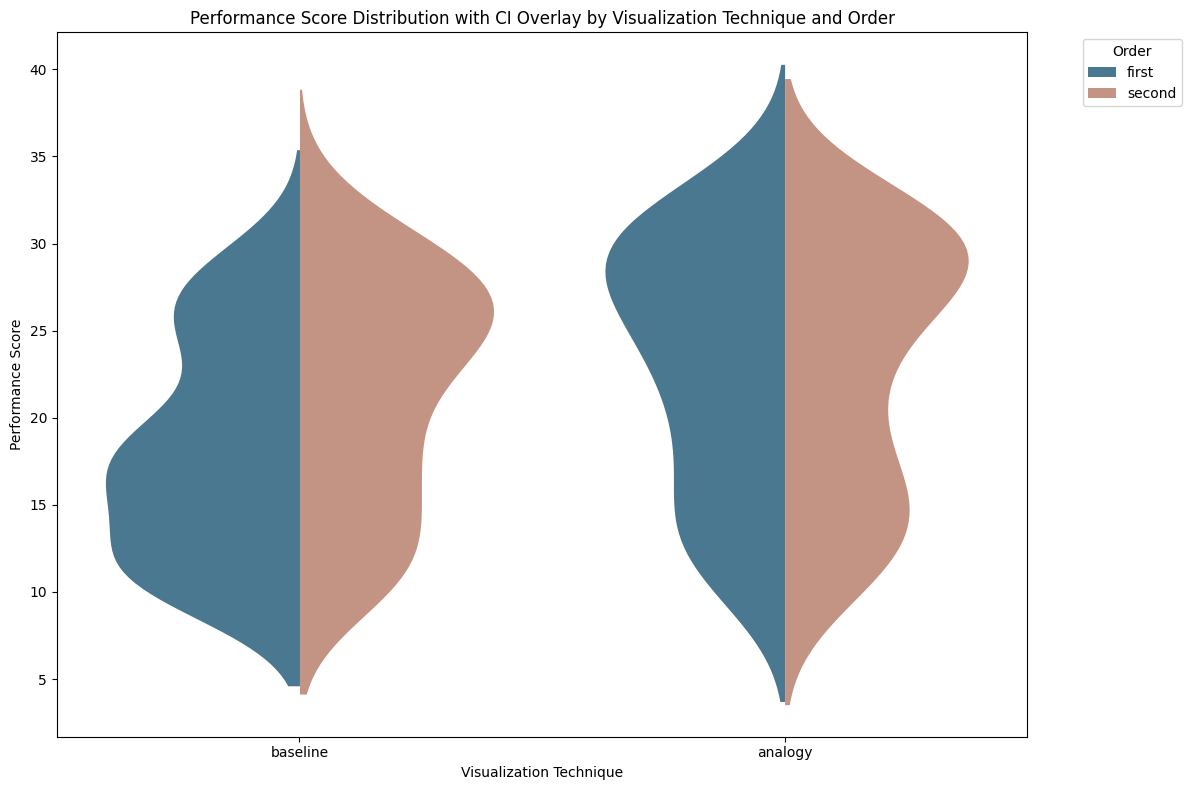

In [329]:
import matplotlib.colors as mcolors

# Assuming 'data' includes columns: 'PerformanceScore', 'VisualizationTechnique', and 'Order'

plt.figure(figsize=(12, 8))

# Base colors for visualization techniques
base_colors = {
    'analogy': '#2f5f78',
    'baseline': '#b661454D'
}

# Create a violin plot showing the distribution of scores
sns.violinplot(
    x='VisualizationTechnique', 
    y='PerformanceScore', 
    hue='Order', 
    data=data, 
    split=True, 
    inner=None,  # Do not show inner data points
    palette=[mcolors.to_rgba(adjust_color_lightness(base_colors['analogy'], amount=1.3), alpha=0.1), 
             mcolors.to_rgba(adjust_color_lightness(base_colors['baseline'], amount=1.3), alpha=0.2)],
    linewidth=0
)

# Overlay the means with 95% confidence intervals using a point plot
# sns.pointplot(
#     x='VisualizationTechnique', 
#     y='PerformanceScore', 
#     hue='Order', 
#     data=data, 
#     dodge=0.4,       # Separate the points horizontally
#     markers='o',     # Shape of the marker
#     join=False,      # Do not join with lines, just points
#     palette=[base_colors['analogy'], base_colors['baseline']],  # Use base colors for contrast
#     ci=95,           # Show 95% confidence intervals
#     capsize=0.2      # Cap size for error bars
# )

# Customize the plot
plt.title('Performance Score Distribution with CI Overlay by Visualization Technique and Order')
plt.xlabel('Visualization Technique')
plt.ylabel('Performance Score')
plt.legend(title='Order', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [330]:


# # Update the existing 'ChartDifficulties' column in the main data DataFrame
# data['ChartDifficulties'] = data['ChartType'].map(chart_mean_scores.set_index('ChartType')['DifficultyLevel'])

# # Verify that the integration worked
# print(data[['ChartType', 'ChartDifficulties']].drop_duplicates())
print(data.head())

filtered_data = data[data['DescriptionScore'] > 0]
if filtered_data.empty:
    print("Filtered data is empty!")
    
print("DataFrame shape:", data.shape)

# visual emblishment
filtered_data['VisualizationTechnique'] = filtered_data['VisualizationTechnique'].astype('category')
filtered_data['VisualizationTechnique'] = filtered_data['VisualizationTechnique'].cat.reorder_categories(['baseline', 'analogy'], ordered=True)
filtered_data['Order'] = filtered_data['Order'].astype('category')
filtered_data['ChartDifficulties'] = filtered_data['ChartDifficulties'].astype('category')
filtered_data['PROLIFIC_PID'] = filtered_data['PROLIFIC_PID'].astype('category')

# Define the model formula
formula = 'DescriptionScore ~ VisualizationTechnique * ChartDifficulties + Order'

# Fit the mixed-effects model
md = smf.mixedlm(formula, filtered_data, groups=filtered_data['PROLIFIC_PID'])
mdf = md.fit()
print(mdf.summary())


                 PROLIFIC_PID         ResponseId   Order Technique  \
0    676b2f0c4db67fedf62f9bb2  R_11ctok9VXZF1vV3  second   analogy   
72   65dced0d02a94d3dfdc2457d  R_4nCXfyI48N8HeR5   first   analogy   
73   65dced0d02a94d3dfdc2457d  R_4nCXfyI48N8HeR5  second  baseline   
182  671548f8dd0a40f33a705949  R_8SuTwo9G0GBp6Ia  second   analogy   
183  671548f8dd0a40f33a705949  R_8SuTwo9G0GBp6Ia   first  baseline   

     PerformanceScore  DescriptionScore ChartDifficulties VARK  sketchscore  \
0                  29                10              Easy    A            5   
72                 26                10              Easy    R            5   
73                 21                10              Easy    R            5   
182                19                10              Easy    V            0   
183                19                10              Easy    V            0   

    VisualizationTechnique       ChartType  TotalTime  ChartOrder  \
0                  analogy  Butterf

/var/folders/s3/gx423dyd2hg9sfb092jr70f00000gn/T/ipykernel_13262/3105850361.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['VisualizationTechnique'] = filtered_data['VisualizationTechnique'].astype('category')
/var/folders/s3/gx423dyd2hg9sfb092jr70f00000gn/T/ipykernel_13262/3105850361.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['VisualizationTechnique'] = filtered_data['VisualizationTechnique'].cat.reorder_categories(['baseline', 'analogy'], ordered=True)
/var/fold

In [331]:
# Filter data for each visualization technique
analogy_scores = data[data['VisualizationTechnique'] == 'analogy']['DescriptionScore']
baseline_scores = data[data['VisualizationTechnique'] == 'baseline']['DescriptionScore']

# Verify that the data sets are not empty
print(f"Number of observations for analogy: {len(analogy_scores)}")
print(f"Number of observations for baseline: {len(baseline_scores)}")

# Perform t-test
t_stat, p_value = ttest_ind(analogy_scores, baseline_scores, equal_var=False)  # Welch's t-test for unequal variances

print(f"T-statistic: {t_stat}, p-value: {p_value}")

Number of observations for analogy: 128
Number of observations for baseline: 128
T-statistic: -0.16135951882954674, p-value: 0.8719386717067432


In [332]:
import pandas as pd
from scipy.stats import ttest_ind

# Assuming 'data' is your DataFrame containing the columns: 'VisualizationTechnique', 'ChartDifficulties', and 'DescriptionScore'

# Filter the data to only include rows where ChartDifficulties is "Hard"
hard_data = data[data['ChartDifficulties'] == 'Easy']


# Get DescriptionScores for the 'analogy' technique
analogy_scores = hard_data[hard_data['VisualizationTechnique'] == 'analogy']['DescriptionScore']

# Get DescriptionScores for the 'baseline' technique
baseline_scores = hard_data[hard_data['VisualizationTechnique'] == 'baseline']['DescriptionScore']

# Perform an independent t-test (Welch's t-test)
t_stat, p_value = ttest_ind(analogy_scores, baseline_scores, equal_var=False)  # Welch's t-test assumes unequal variances

# Print the results
print(f"T-test results for DescriptionScore (Hard charts after adjustment):")
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")


T-test results for DescriptionScore (Hard charts after adjustment):
T-statistic: -0.165, P-value: 0.869


In [333]:
# for easy 

# Filter data for 'Easy' difficulty

from scipy.stats import ttest_ind

data = pd.DataFrame({
    'ChartDifficulties': ['Easy', 'Easy', 'Hard', 'Hard', 'Hard', 'Hard'],
    'VisualizationTechnique': ['baseline', 'analogy', 'baseline', 'baseline', 'analogy', 'analogy'],
    'MeanScore': [9.5625, 9.5000, 7.1625, 7.5000, 8.5125, 8.7000]
})


# Filter data for 'Hard' difficulty
hard_data = data[data['ChartDifficulties'] == 'Easy']

# Separate scores for 'analogy' and 'baseline' techniques
hard_baseline_scores = hard_data[hard_data['VisualizationTechnique'] == 'baseline']['MeanScore']
hard_analogy_scores = hard_data[hard_data['VisualizationTechnique'] == 'analogy']['MeanScore']

# Perform the t-test
t_stat, p_value = ttest_ind(hard_baseline_scores, hard_analogy_scores, equal_var=False)  # Welch's t-test

# Output the results
print("T-test results comparing Easy difficulty scores between Analogy and Baseline:")
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference in Easy difficulty scores between Analogy and Baseline techniques.")
else:
    print("No statistically significant difference in Easy difficulty scores between Analogy and Baseline techniques.")


T-test results comparing Easy difficulty scores between Analogy and Baseline:
T-statistic: nan, P-value: nan
No statistically significant difference in Easy difficulty scores between Analogy and Baseline techniques.


In [334]:
import pandas as pd
from scipy.stats import ttest_ind

# Assume your DataFrame 'data' includes 'PerformanceScore', 'VisualizationTechnique', and 'VARKPreference'.

def perform_vark_comparison(data):
    # Unique VARK preferences
    vark_preferences = data['VARK'].unique()
    
    # Bonferroni corrected significance level
    alpha = 0.05 / 4
    
    # Loop through each VARK preference
    for vark in vark_preferences:
        print(f"VARK Preference: {vark}")
        
        # Filter data for the specific VARK preference
        vark_data = data[data['VARK'] == vark]
        
        # Retrieve scores for "baseline" and "analogy" techniques
        baseline_scores = vark_data[vark_data['VisualizationTechnique'] == 'baseline']['PerformanceScore']
        analogy_scores = vark_data[vark_data['VisualizationTechnique'] == 'analogy']['PerformanceScore']
        
        # Ensure there is enough data for statistical testing
        if len(baseline_scores) > 1 and len(analogy_scores) > 1:
            # Perform t-test
            t_stat, p_value = ttest_ind(baseline_scores, analogy_scores, equal_var=False)
            
            # Print results
            print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")
            significant = "Significant difference!" if p_value < alpha else "No significant difference."
            print(significant)
        else:
            print("Not enough data for t-test.")
        
        print("-" * 50)

# Example call to the function
perform_vark_comparison(data)


KeyError: 'VARK'

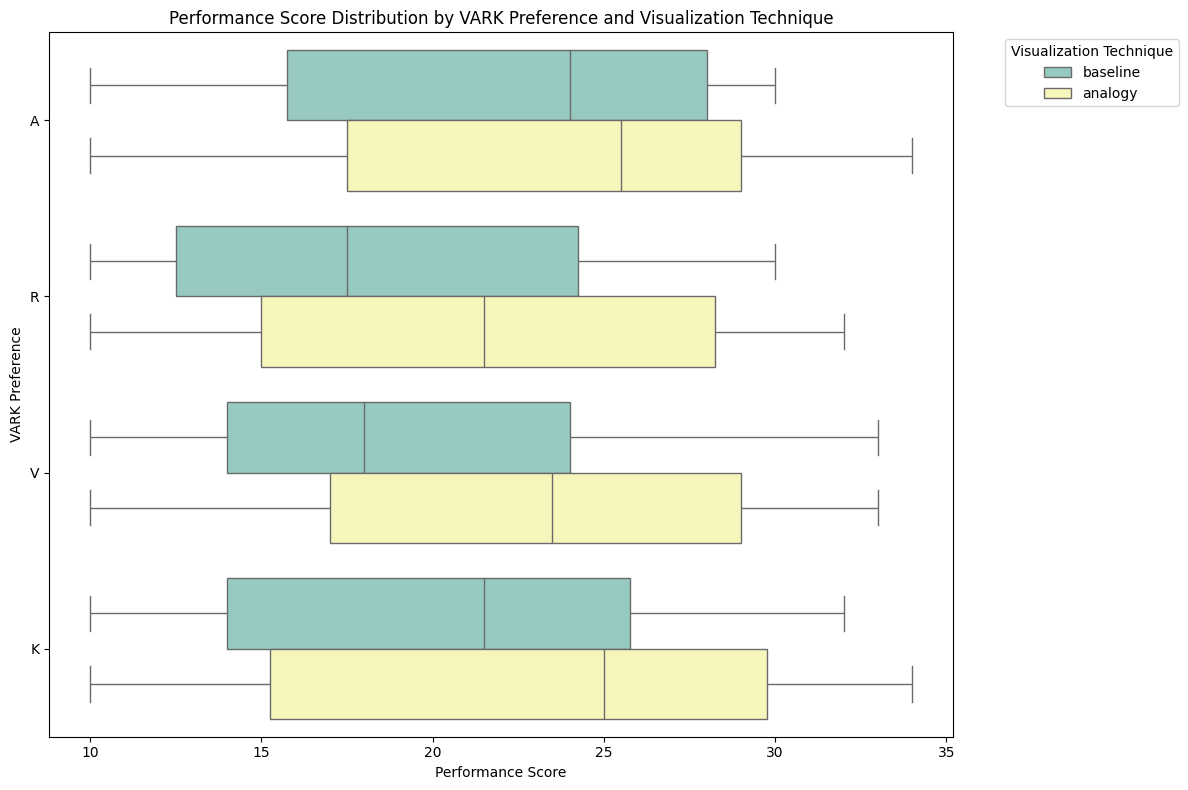

In [ ]:
import seaborn as sns

# Assume 'data' is your DataFrame and includes 'PerformanceScore', 'VisualizationTechnique', and 'VARKPreference'

plt.figure(figsize=(12, 8))

# Create a box plot
sns.boxplot(
    x='PerformanceScore', 
    y='VARK', 
    hue='VisualizationTechnique', 
    data=data, 
    palette='Set3'
)

# Customize the plot
plt.title('Performance Score Distribution by VARK Preference and Visualization Technique')
plt.xlabel('Performance Score')
plt.ylabel('VARK Preference')
plt.legend(title='Visualization Technique', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [53]:
# calculate the mean and 95% CI for each group of VARK preference and visualization technique

# Group by 'VARK' and 'VisualizationTechnique' and apply the function

group_stats = data.groupby(['VARK', 'VisualizationTechnique'])['PerformanceScore'].apply(mean_confidence_interval).reset_index()

# Split the results into separate columns for mean and confidence intervals

group_stats[['Mean', 'CI Lower', 'CI Upper']] = pd.DataFrame(group_stats['PerformanceScore'].tolist(), index=group_stats.index)

# Drop the original 'PerformanceScore' which is now split

group_stats = group_stats.drop(columns='PerformanceScore')

# Print the results

print(group_stats)

  VARK VisualizationTechnique       Mean   CI Lower   CI Upper
0    A               baseline  21.678571  18.959021  24.398122
1    A                analogy  23.571429  20.653571  26.489286
2    K               baseline  20.394737  18.256991  22.532483
3    K                analogy  23.342105  20.910727  25.773484
4    R               baseline  18.343750  15.961679  20.725821
5    R                analogy  21.968750  19.394016  24.543484
6    V               baseline  18.700000  16.342142  21.057858
7    V                analogy  22.733333  19.970279  25.496388


/var/folders/s3/gx423dyd2hg9sfb092jr70f00000gn/T/ipykernel_13262/1866824529.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_stats = data.groupby(['VARK', 'VisualizationTechnique'])['PerformanceScore'].apply(mean_confidence_interval).reset_index()


/var/folders/s3/gx423dyd2hg9sfb092jr70f00000gn/T/ipykernel_13262/3826147912.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(
/var/folders/s3/gx423dyd2hg9sfb092jr70f00000gn/T/ipykernel_13262/3826147912.py:4: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(


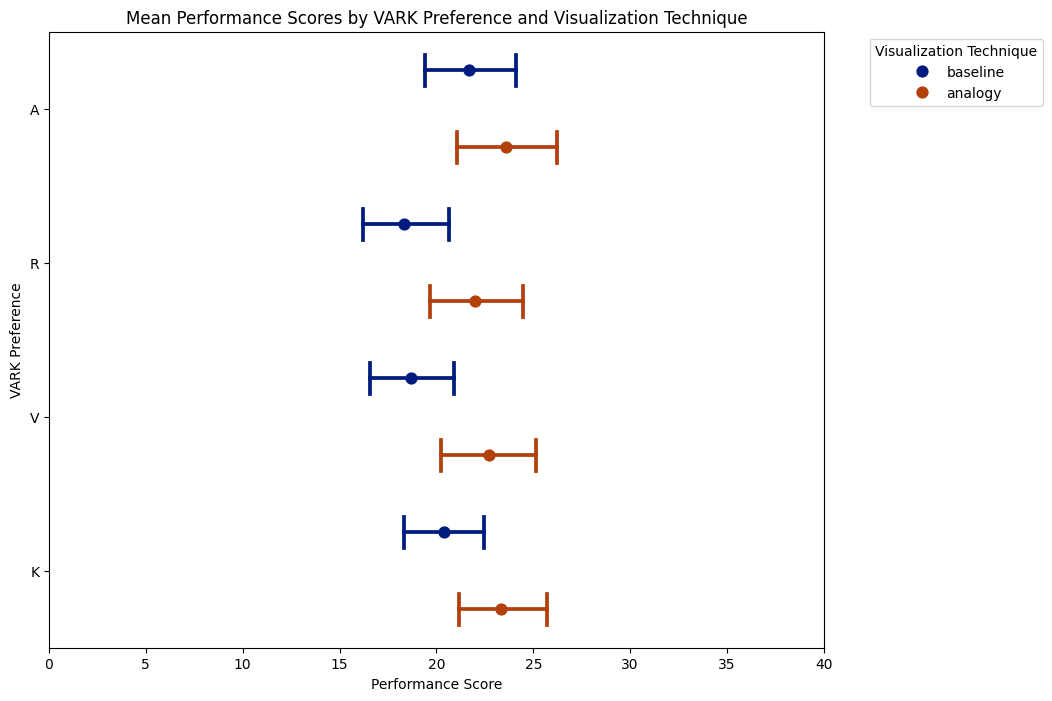

In [ ]:
plt.figure(figsize=(10, 8))

# Create the point plot
sns.pointplot(
    y='VARK', 
    x='PerformanceScore', 
    hue='VisualizationTechnique', 
    data=data, 
    dodge=0.5,      # Separate the points for different techniques horizontally
    join=False,     # Do not join the points with lines
    palette='dark', # Dark palette for better contrast
    ci=95,          # Show 95% confidence intervals
    markers='o',    # Marker for the mean points
    capsize=0.2     # Error bar caps
)

# Set x-axis range
plt.xlim(0, 40)

# Customize the plot
plt.title('Mean Performance Scores by VARK Preference and Visualization Technique')
plt.xlabel('Performance Score')
plt.ylabel('VARK Preference')
plt.legend(title='Visualization Technique', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


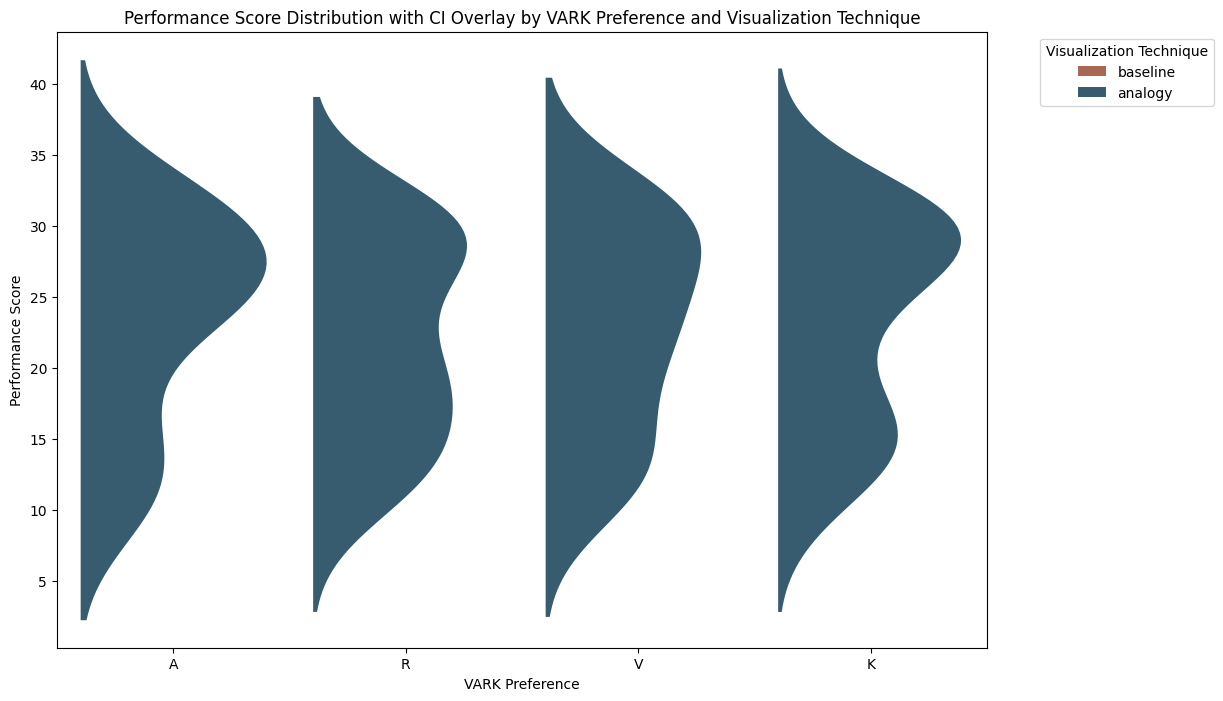

In [ ]:
# apply violin on top, just the analogies

# Assume 'data' is your DataFrame and includes 'PerformanceScore', 'VisualizationTechnique', and 'VARKPreference'

plt.figure(figsize=(12, 8))

# Create a violin plot showing the distribution of scores

sns.violinplot(
    x='VARK', 
    y='PerformanceScore', 
    hue='VisualizationTechnique', 
    data=data[data['VisualizationTechnique'] == 'analogy'], 
    split=True, 
    inner=None,  # Do not show inner data points
    palette=['#b661454D', '#2f5f78'],
    linewidth=0
)

# Overlay the means with 95% confidence intervals using a point plot

# sns.pointplot(
#     x='VARK', 
#     y='PerformanceScore', 
#     hue='VisualizationTechnique', 
#     data=data[data['VisualizationTechnique'] == 'analogy'], 
#     dodge=0.4,       # Separate the points horizontally
#     markers='o',     # Shape of the marker
#     join=False,      # Do not join with lines, just points
#     palette='dark',  # Use a different palette for contrast
#     ci=95,           # Show 95% confidence intervals
#     capsize=0.2      # Cap size for error bars
# )

# Customize the plot

plt.title('Performance Score Distribution with CI Overlay by VARK Preference and Visualization Technique')
plt.xlabel('VARK Preference')
plt.ylabel('Performance Score')
plt.legend(title='Visualization Technique', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [56]:

# Assume 'data' is your DataFrame and includes 'PerformanceScore', 'VisualizationTechnique', and 'VARKPreference'

# Filter the data for 'analogy' visualization technique
analogy_data = data[data['VisualizationTechnique'] == 'analogy']

# Perform ANOVA
f_statistic, p_value = f_oneway(
    *[analogy_data[analogy_data['VARK'] == vark]['PerformanceScore'] for vark in analogy_data['VARK'].unique()]
)

print(f"ANOVA F-statistic: {f_statistic:.3f}, P-value: {p_value:.3f}")

# Continue with post-hoc test only if ANOVA is significant
if p_value < 0.05:
    # Perform Tukey's HSD test for multiple comparisons
    tukey_results = pairwise_tukeyhsd(
        endog=analogy_data['PerformanceScore'],
        groups=analogy_data['VARK'],
        alpha=0.05 / 4  # Bonferroni correction for multiple comparisons
    )
    print(tukey_results)

ANOVA F-statistic: 0.299, P-value: 0.826


In [57]:
vark_stats = data.groupby('VARK')['PerformanceScore'].agg(['mean', 'std']).reset_index()

# Print the results
print(vark_stats)

  VARK       mean       std
0    A  22.625000  7.270269
1    K  21.868421  7.075483
2    R  20.156250  7.064822
3    V  20.716667  7.116683
